# Benchmarking Metrics

In [9]:
# Calls the function many times
# Reports average
%timeit 
x = mypileup.myutils.GetQual(0)

153 ns ± 2.37 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## Runs on different size reference genome

In [1]:
import numpy as np

In [44]:
# Generate Multiple Reference Genomes

for i in range(40):

    outr = open(f"ref_sizes/reference{i}.fa", "w")
    outr.write(f">chr{i}\n")
    reference = ""
    for _ in range(i*5000):
        reference += np.random.choice(["A","T","C","G"])
    outr.write(reference)
    outr.close()

In [45]:
len_reads = 10
outr = open(f"ref_sizes/fq.fastq", "w")
for i in range(200):
    if i % 4 == 0:
        outr.write(f"@{i//4}\n")
    if i % 4 == 1:
        read = ""
        for _ in range(len_reads):
            read += np.random.choice(["A","T","C","G"]) 
        outr.write(read+"\n")
    if i % 4 == 2:
        outr.write("+\n")
    if i % 4 == 3:
        outr.write("F"*len_reads+"\n")
outr.close()

In [50]:
%%bash
for var in 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
do
    REF=${var}
    READS=ref_sizes/fq.fastq
    #echo ref_sizes/reference$REF.fa
    #echo $READS
    #echo $REF.sam
    #echo $REF.txt
    wf-align ref_sizes/reference$REF.fa $READS -o $REF.sam -m $REF.txt
done

In [55]:
%%bash
touch ref_sizes_time.txt
echo time_taken >> ref_sizes_time.txt
for var in 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
do
    REF=${var}
    READS=ref_sizes/fq.fastq
    #echo ref_sizes/reference$REF.fa
    #echo $READS
    #echo $REF.sam
    #echo $REF.txt
    cat $REF.txt | grep "Total Time:" | cut -f2 >> ref_sizes_time.txt
done

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

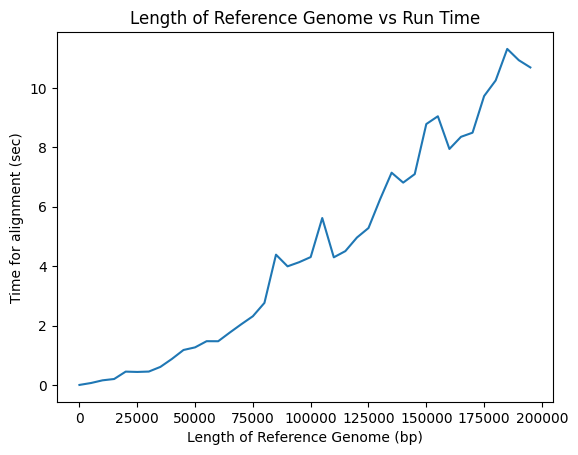

In [58]:
lengths = []
for i in range(40):
    lengths.append(i*5000)
data = pd.read_csv("ref_sizes_time.txt")

data["lengths"] = lengths
data.head()

plt.plot(data["lengths"], data["time_taken"])
plt.title("Length of Reference Genome vs Run Time")
plt.xlabel("Length of Reference Genome (bp)")
plt.ylabel("Time for alignment (sec)")
plt.savefig("Varying_Reference_Length.jpg")

## Runs on different size total reads

In [ ]:
# Generate Multiple Reference Genomes

for i in range(40):

    outr = open(f"ref_sizes/reference{i}.fa", "w")
    outr.write(f">chr{i}\n")
    reference = ""
    for _ in range(i*5000):
        reference += np.random.choice(["A","T","C","G"])
    outr.write(reference)
    outr.close()

## Runs w/ different size total reads and different size reference genome